In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=300
sns.set_style("darkgrid")

In [5]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [6]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [7]:
# checking outlier because we are dealing with outlier in DBSCAN

In [8]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

<Axes: >

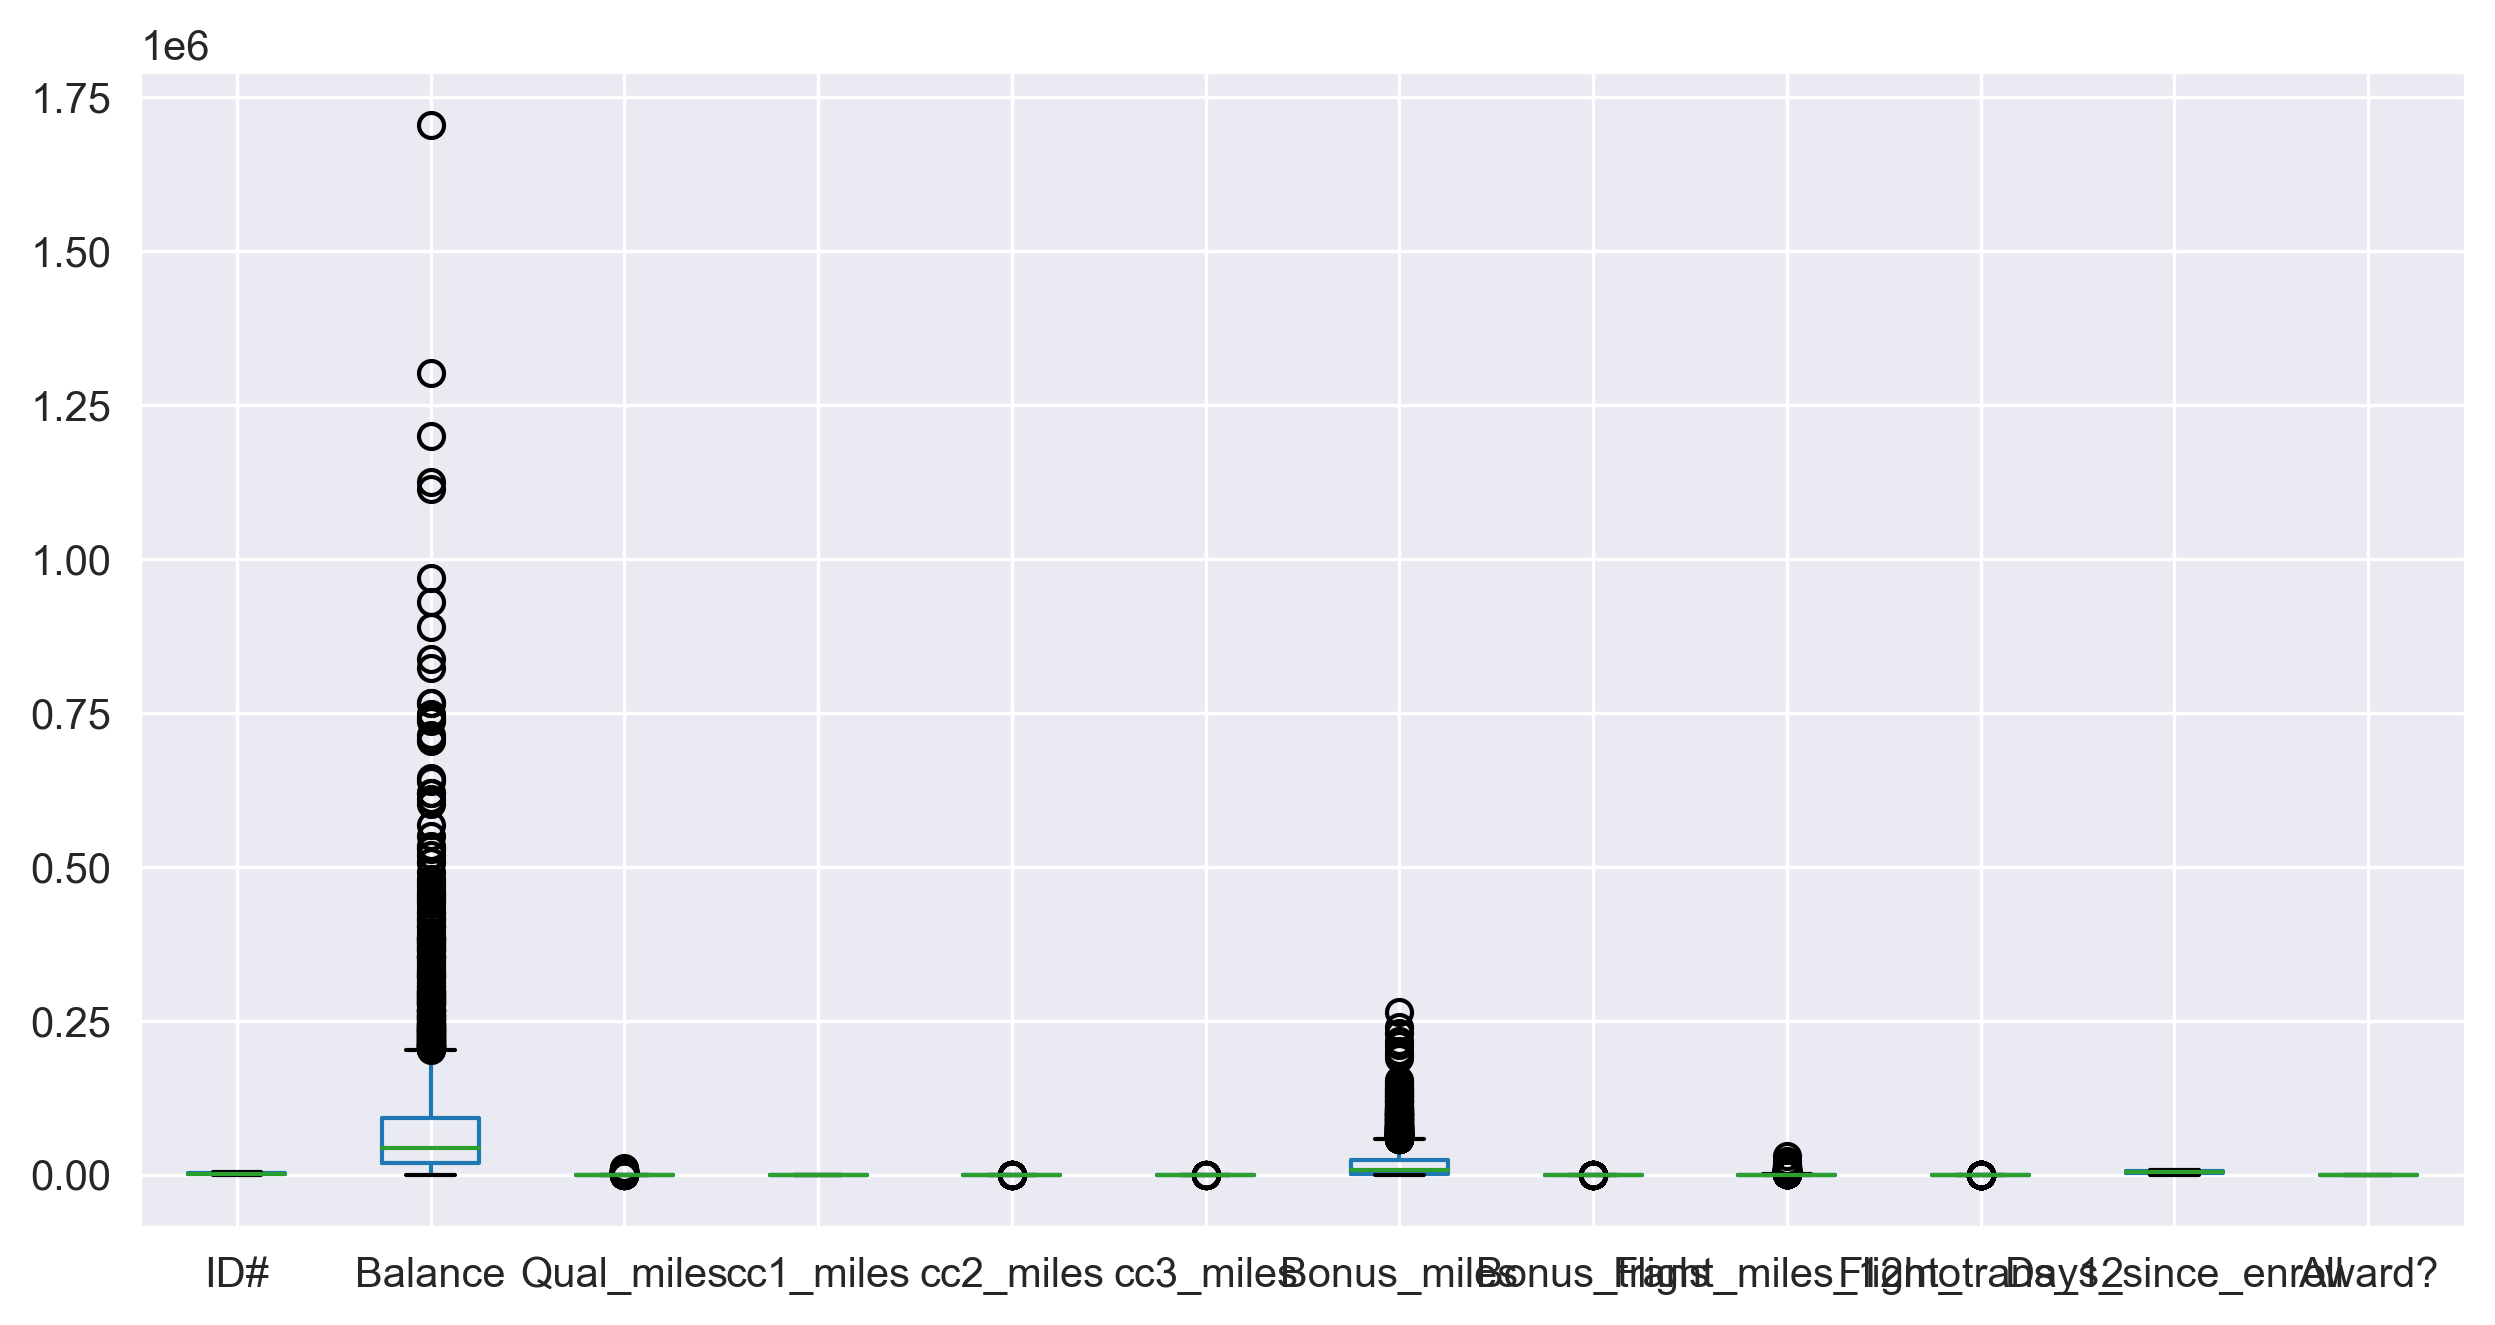

In [9]:
df.boxplot()

In [10]:
# checking no of cluster mannualy with pairplot

sns.pairplot(df)

In [11]:
# feature scaling

from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
df1=sc.fit_transform(df)

In [14]:
df1

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [15]:
# model building
from sklearn.cluster import DBSCAN

In [16]:
db=DBSCAN

In [17]:
db=DBSCAN(eps=0.5,min_samples=3)

predicted_values=db.fit_predict(df1)

In [18]:
predicted_values

array([ 0,  0,  0, ..., 56,  0,  0], dtype=int64)

In [19]:
# checking model evolution by scatter plot and shilhoutte score

In [21]:
plt.scatter(df["cc1_miles"],df["cc2_miles"],c=predicted_values)
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(df1,predicted_values)

-0.3478675429153123

In [24]:
# finding the epsilon value

In [25]:
from sklearn.neighbors import NearestNeighbors

In [26]:
neighbor=NearestNeighbors

In [27]:
predictedvalues1=neighbor(n_neighbors=3).fit(df1)

In [28]:
predictedvalues1

NearestNeighbors(n_neighbors=3)

In [29]:
distance,index=predictedvalues1.kneighbors(df1)

In [30]:
distance

array([[0.        , 0.13537867, 0.13743479],
       [0.        , 0.11407578, 0.13743479],
       [0.        , 0.21956162, 0.27251935],
       ...,
       [0.        , 0.19523778, 0.32719285],
       [0.        , 0.28917928, 0.33007337],
       [0.        , 0.02752204, 0.06504268]])

In [31]:

distance= np.sort(distance[:,1])

In [32]:
distance

array([2.42270462e-03, 2.42270462e-03, 4.69027727e-03, ...,
       6.66765339e+00, 6.68121018e+00, 7.58357087e+00])

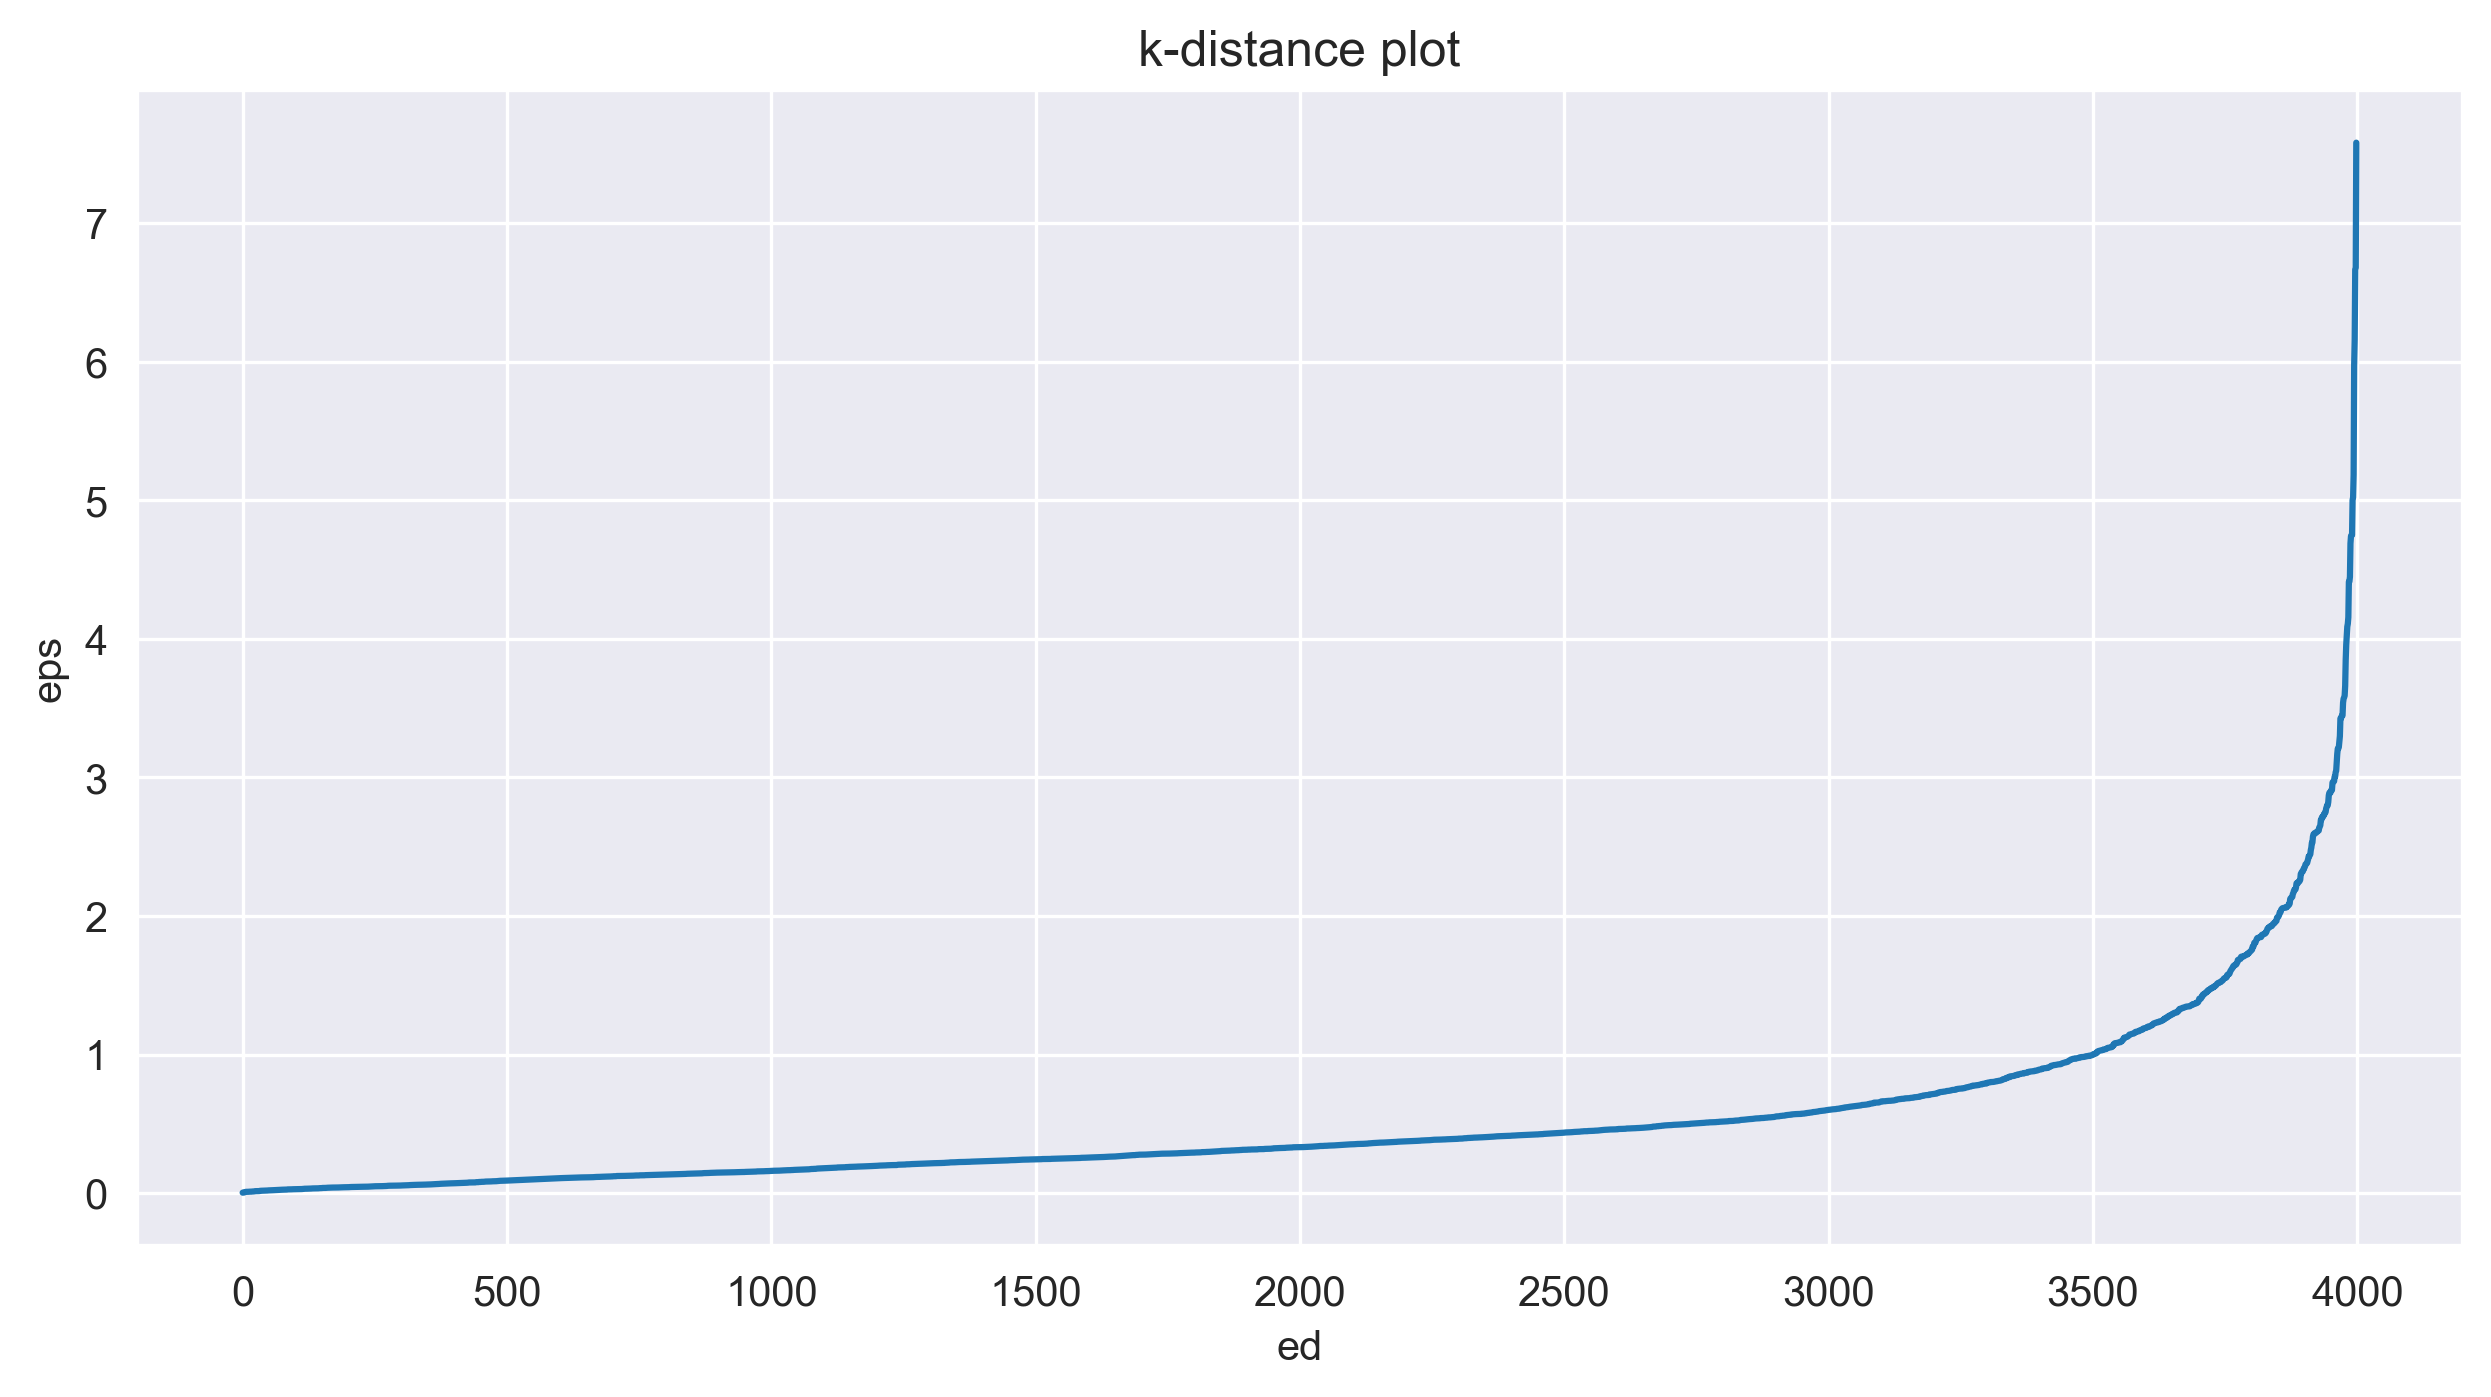

In [33]:
plt.plot(distance)
plt.xlabel("ed")
plt.ylabel("eps")
plt.title("k-distance plot")
plt.show()

In [34]:
db=DBSCAN(eps=2,min_samples=3)

In [35]:
db

DBSCAN(eps=2, min_samples=3)

In [36]:
predictedvalues2=db.fit_predict(df1)

In [37]:
predictedvalues2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
silhouette_score(df1,predictedvalues2)

0.20982236466880683

In [42]:
# analyzing cluster

In [43]:
df["cluster"]=predictedvalues2

In [45]:
df[df["cluster"]==-1]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
50      51   108137           0          1          1          1         6368   
65      66    53914           0          3          1          1        33767   
70      72    84409        5031          2          1          1        15436   
87      90   609477           0          3          1          1        21422   
...    ...      ...         ...        ...        ...        ...          ...   
3897  3920   179832        2954          3          1          1        18218   
3902  3925    13004        1000          1          1          1        13890   
3911  3934    55922        2273          1          1          1         8104   
3917  3940   130748           0          4          1          1        65510   
3934  3957    76595           0          1          1          1        10577   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
50              5               6368                5               6844   
65             45               5550               29               6826   
70             16               1150                4               7766   
87             22               1200                8               6820   
...           ...                ...              ...                ...   
3897           20               2500                5               1569   
3902           39                  0                0               1572   
3911           19               4104               16               1552   
3917           37               6349                7               1545   
3934            2               9577                1               1515   

      Award?  cluster  
8          1       -1  
50         0       -1  
65         1       -1  
70         0       -1  
87         0       -1  
...      ...      ...  
3897       1       -1  
3902       1       -1  
3911       0       -1  
3917       0       -1  
3934       0       -1  

[171 rows x 13 columns]

In [46]:
df.groupby("cluster").agg("mean")

ID#        Balance   Qual_miles  cc1_miles  cc2_miles  \
cluster                                                                  
-1       1701.847953  246226.415205  1653.058480   2.859649   1.099415   
 0       2175.635659   57778.840881    59.675235   1.695226   1.000000   
 1       1756.924117   79378.116454   100.748310   2.656649   1.000000   
 2       2178.428571   40618.000000     0.000000   1.000000   2.000000   
 3       2388.250000   39218.500000     0.000000   1.000000   2.000000   
 4        947.333333   52906.000000  4062.333333   4.333333   1.000000   
 5       1364.250000  106247.500000   273.500000   1.000000   1.000000   
 6        883.000000  781291.333333     0.000000   1.000000   1.000000   
 7       2417.666667   51096.000000     0.000000   1.000000   3.000000   
 8       2282.500000  164878.000000     0.000000   1.000000   1.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
cluster                                                            
-1         1.28655  53917.017544    27.403509        3664.315789   
 0         1.00000   9784.870257     8.899633         190.563443   
 1         1.00000  26063.294515    14.420736         509.947408   
 2         1.00000   8444.142857    14.285714         250.000000   
 3         1.00000   9189.250000    13.500000         209.375000   
 4         1.00000  54419.000000    15.666667         366.666667   
 5         1.00000   8641.000000    19.250000        6991.000000   
 6         1.00000  17995.000000     8.666667         723.333333   
 7         1.00000  15561.666667    14.333333          44.444444   
 8         1.00000  17867.500000    27.000000        7655.000000   

         Flight_trans_12  Days_since_enroll    Award?  
cluster                                                
-1             10.596491        4761.421053  0.777778  
 0              0.559772        3814.869441  0.000000  
 1              1.583772        4593.121713  1.000000  
 2              0.714286        4612.285714  1.000000  
 3              0.812500        3511.187500  0.000000  
 4              1.000000        5946.666667  1.000000  
 5             18.000000        5112.000000  0.000000  
 6              2.000000        6071.000000  1.000000  
 7              0.222222        3603.444444  0.000000  
 8             25.000000        3707.250000  1.000000